# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [190]:
a = np.zeros((1, 10))
a[0, 4] = 1
a.reshape(2, 5)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [191]:
b = np.arange(10, 50)
b1 = b[::-1]
b1[1::2]

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [192]:
c = np.arange(0, 9)
c.reshape(3, 3)


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [193]:
#перый способ
d = np.empty((( 4, 3, 2)))
max_element = np.max(d)
min_element = np.min(d)
print(max_element)
print(min_element)

1.8692073577802233e-306
3.756031e-317


In [194]:
#второй способ
d2 = np.random.rand( 4, 3, 2)
max_element_2 = np.max(d2)
min_element_2 = np.min(d2)
print(max_element_2)
print(min_element_2)

0.9710248066655505
0.02282743748422733


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [195]:
f = np.arange(0, 24)
f.resize(6,4)
f1 = np.arange(1, 13)
f1.resize(4, 3)
f.dot(f1)

array([[ 48,  54,  60],
       [136, 158, 180],
       [224, 262, 300],
       [312, 366, 420],
       [400, 470, 540],
       [488, 574, 660]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [196]:
j = np.empty((( 7, 7)))
average = j.mean()
std = j.std()
data_norm = (j - j.min())/ (j.max() - j.min())
(average, std, data_norm)

(2.1382367270389794e+92,
 1.0365404329147095e+93,
 array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         5.30539000e-256, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000],
        [1.66134350e-294, 0.00000000e+000, 8.13903730e-208,
         0.00000000e+000, 0.00000000e+000, 1.53210778e-005,
         0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000],
        [7.75383610e-208, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000],
        [8.61602194e-078, 6.61529661e-203, 0.00000000e+000,
         1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000],
        [1.07254178e-289, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         8.61602202e-078],
        [1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [54]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [125]:
import pandas as ps
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


### Загрузите датасет Tips из набора датасетов seaborn

In [197]:
tips = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [198]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [199]:
tips.shape

(244, 7)

In [201]:
length = len(tips)
num_colon = len(tips.columns.values.tolist())
(length, num_colon)

(244, 7)

### Проверьте есть ли пропуски в данных

In [202]:
tips.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

### Посмотрите на распределение числовых признаков

In [203]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [204]:
tips.total_bill.max()

50.81

### Найдите количество курящих людей

In [205]:
#tips['smoker'].value_counts()
#result = tips.groupby('smoker').filter(lambda x: x == "Yes")
result =len(tips[tips['smoker'] == "Yes"].values)
result
#tips['smoker'].unique()

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [206]:
tips.groupby('day')['total_bill'].mean().sort_values()

C:\Users\lovew\AppData\Local\Temp\ipykernel_39744\1127780637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['total_bill'].mean().sort_values()


day
Fri     17.151579
Thur    17.682742
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [207]:
#tips.groupby('sex')[tips['total_bill'] > (tips['total_bill'].median())]
tips[tips['total_bill'] > (tips['total_bill'].median())]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [208]:
tips.groupby('sex')['tip'].mean()

C:\Users\lovew\AppData\Local\Temp\ipykernel_39744\2929813174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['tip'].mean()


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [210]:
#Первый вариант
s = sns.load_dataset('tips')
tips.smoker = tips.smoker.replace({ 'No' : 0 , "Yes" : 1 })


In [211]:
#Второй вариант
tips['smoker'].map(lambda x: 0 if x == 'No' else 1)

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: smoker, Length: 244, dtype: int64

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

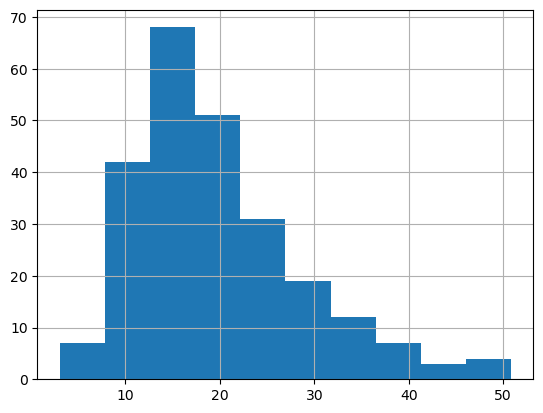

In [212]:
tips['total_bill'].hist();

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

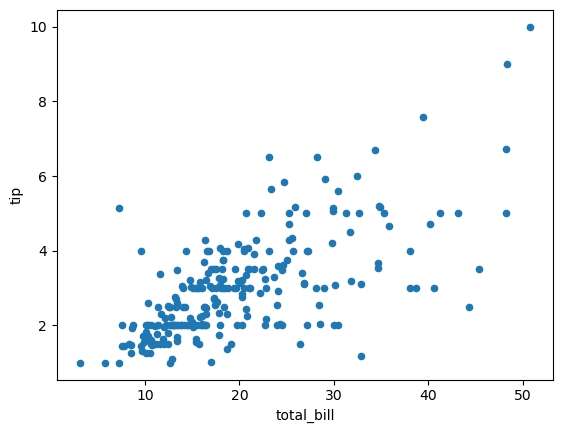

In [213]:
tips.plot.scatter(x='total_bill', y='tip');

### Постройте pairplot

E:\Install\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Install\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Install\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


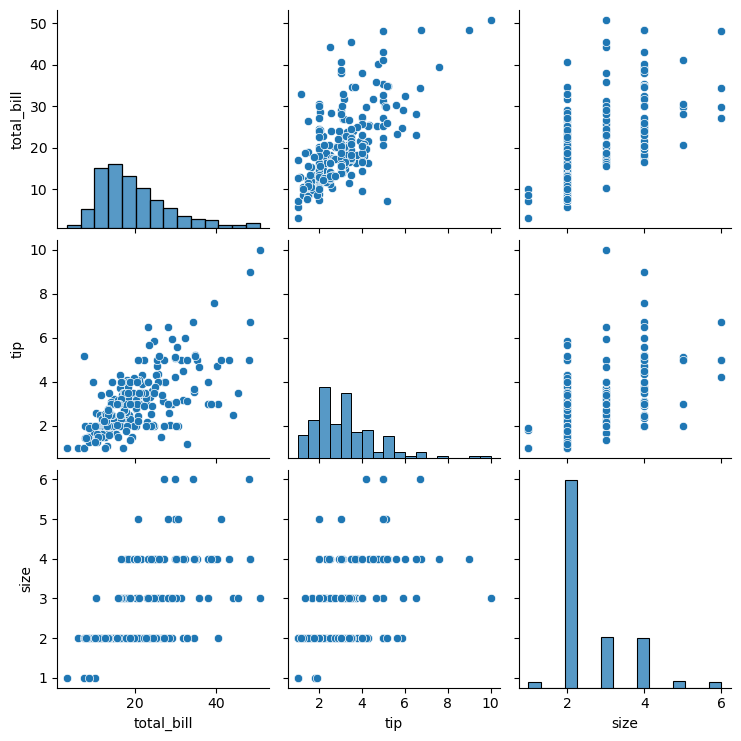

In [214]:
sns.pairplot(tips);

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

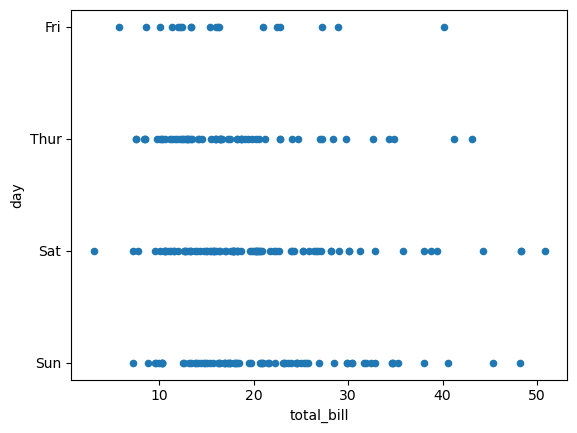

In [215]:
tips.plot.scatter(x='total_bill', y='day');

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

TypeError: Axes.hist() missing 1 required positional argument: 'x'

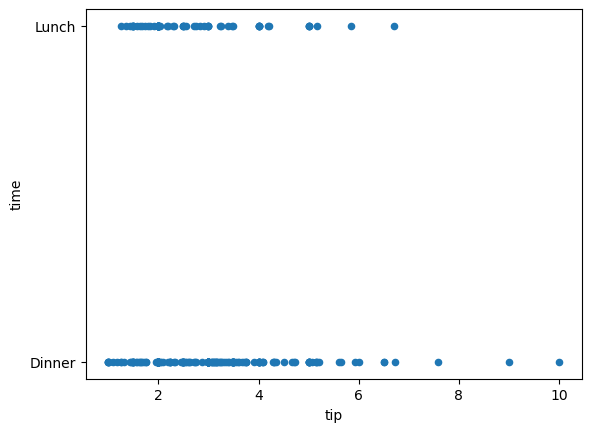

In [189]:
#tips.plot.scatter(x='tip', y='time').hist();
#tips_transform = tips.unstack()
#tips_transform.plot.barh(stacked=True);
#tips[['time', 'sex']].plot.hist(alpha=0.5);

#result_tip_by_time = tips.groupby('time')['tip'].value_counts()
#result_tip_by_time

#sns.histplot(result_tip_by_time);
#result_tip_by_time.plot(x='tip', y='time').hist();
#result_tip_by_time.plot.hist();
#kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
#plt.hist(result_tip_by_time['Dinner'], **kwargs)
#plt.hist(result_tip_by_time['Launch'], **kwargs)
tips.plot.scatter(x='tip', y='time').hist();

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

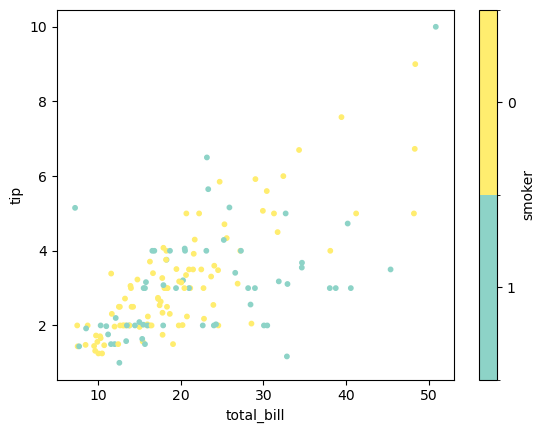

In [216]:
tips_male = tips[tips['sex'] == 'Male' ]
tips_male.plot.scatter(x='total_bill', y='tip', c = 'smoker', cmap = "Set3", s=10 );

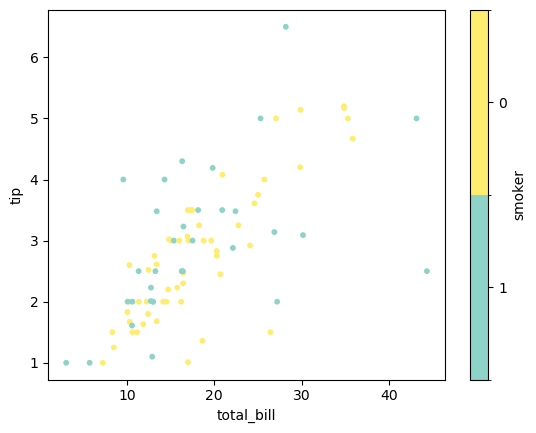

In [217]:
tips_female = tips[tips['sex'] == 'Female' ]
tips_female.plot.scatter(x='total_bill', y='tip', c = 'smoker', cmap = "Set3", s=10 );

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [ ]:
#Больше всего тратят в субботу и воскресенье. Мужчины оставляют больше чаевых.
#Курящие женщины склоны больше оставлять чаевые. За ужин посетители больше оставляют чаевые
# Средний чек колеблется в промежутке от 13 до 22